#### 2-dimentional animation

This code produce an animation of Ez component in TEz-solver as a heatmap.

All data in "2D_anim._values.txt" had been created after run of 2Dimention_solution_TEz.cpp. So, first cell is properly parse whole data, second one is just showing it,frame (at time) by frame.

I added the appropriate colorbar, you can read the explanation at this link: https://joseph-long.com/writing/colorbars/, I also added saving option. Now, if you want to save it as a .gif file just delete '#' symol in corresponding line.

In [108]:
#########/ data initializing /#################################################
SRC_POS_X, SRC_POS_Y = 100, 100

Ez = []
with open("2D_anim._values.txt", 'r') as f:
    TIME = (int)(f.readline())
    SIZE = f.readline().split(' ')
    SIZE_X = (int)(SIZE[0])
    SIZE_Y = (int)(SIZE[1])
    for t in range(TIME):
        temp = f.readline() 
        temp = temp.split(' ')[:-1]
        Ez_X = []
        for X in range(len(temp)) : # [0.01, 0.02, 0.03]
            Ez_X.append(list(map(float, temp[X].split(',')[:-1])))
        #Ez_X = list(map(list, zip(*Ez_X)))[::-1] # transposing data
        Ez.append(Ez_X)

<IPython.core.display.Javascript object>


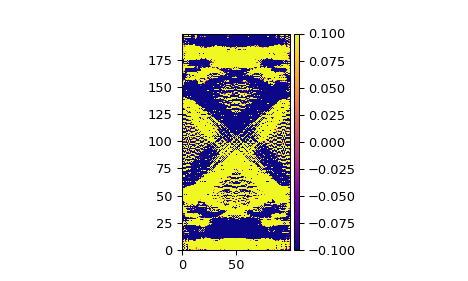

In [113]:
#########/ animation /#########################################################
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib notebook

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111, xlim=(0,SIZE_Y-1), ylim=(0,SIZE_X-1))

def redraw(i):
    Ez_.set_data(Ez[i]) 
    return Ez_ 

Ez_ = ax.imshow(Ez[0],
                cmap = plt.get_cmap('plasma'),
                interpolation="gaussian",
                animated=True,
                #aspect="auto" # first solution of colorbar-axes problem  
                )

#bound = ax.plot([SIZE_X/2, SIZE_X/2], [0, SIZE_Y], color = 'r')

fig.colorbar(Ez_,
             cax=make_axes_locatable(ax).append_axes("right", 
                                                     size="4%", 
                                                     pad=0.05)
             # second & suitable solution
             )

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=TIME,
                               interval=10,
                               blit=True,
                               )

#anim.save("TEz_2Dimentional_animation.gif", writer="imagemagick", fps = 30)

plt.show()